# Булевы операции и математический нейрон

Реализуем в качестве примера булевы операции "или" и "исключающее или".

In [92]:
# функция, реализующая нейрон (подаем картеж входных значений, картеж весов и смещение)
def neuron(inputs, weights, b):
    z = b
    for i, w in zip(inputs, weights):
        z += i * w
    return 1 if z > 0 else 0 # пороговая функция активации

Операцию "исключающее или" можно реализовать с помощью 3 нейронов: NAND (не и), OR и AND.

In [93]:
# функция для "или"
def neuron_or(x, y):
    return neuron((x, y), (1, 1), 0)

# функция для "исключающее или"
def neuron_xor(x, y):
    a = neuron((x, y), (-1, -1), 1.5)  # NAND
    b = neuron((x, y), (1, 1), 0) # OR
    return neuron((a, b), (1, 1), -1)  # AND

Протестируем работоспособность наших нейронов (сверяться будем с таблицей истинности)

In [94]:
def test_or():
    for x, y, a in [(0, 0, 0), (0, 1, 1), (1, 0, 1), (1, 1, 1)]:
        assert a == neuron_or(x, y) # вернем error, если что не так


def test_xor():
    for x, y, a in [(0, 0, 0), (0, 1, 1), (1, 0, 1), (1, 1, 0)]:
        assert a == neuron_xor(x, y) # вернем error, если что не так


if __name__ == '__main__':
    test_or()
    test_xor()

# Основы PyTorch

На этом занятии мы рассмотрим основы фреймворка глубокого обучения PyTorch.  

**Фреймворк** - модуль, в которых есть функционал, с помощью которого можно быстро и просто решать типовые задачи, и уже с помощью этих средств писать решения к более сложным задачам. 

По сути это просто набор уже готовых блоков.

<p style="align: center;"><img src="https://raw.githubusercontent.com/pytorch/pytorch/master/docs/source/_static/img/pytorch-logo-dark.png", width=450, height=100></p>

На данный момент основными фреймворками для глубокого обучения являются **TensorFlow и PyTorch**, остальные встречаются гораздо реже. 

Разница между всеми ними главным образом в том, каков общий принцип вычислений. 

Например, в **Caffe2** вы пишете код, по сути, составляя его из готовых "кусочков", как в Lego. 

В **TensorFlow** вы сначала объявляете вычислительный граф, потом компилируете его и запускаете. 

В то время как в **PyTorch** граф вычислений создаётся только при запуске (то есть существует только во время выполнения, потом он "разрушается").

Другими словами, **PyTorch** - это динамический граф вычислений, а **TensorFlow** - статический граф. 

<p style="align: center;"><img src="https://habrastorage.org/web/e3e/c3e/b78/e3ec3eb78d714a7993a6b922911c0866.png", width=400, height=300></p>  

Картинка взята из [статьи на Хабре](https://habr.com/post/334380/)

## Установка

Инструкция по установке PyTorch есть на официальном сайте [PyTorch](https://pytorch.org/get-started/locally/).

## Синтаксис

PyTorch имеет 3 уровня абстракции:  
i. **Тензор** — императивный n-мерный массив, который работает на графическом процессоре.

ii. **Переменная** — узел в вычислительном графе. Здесь хранятся данные и градиент.

iii. **Модуль** — уровень нейронной сети, который будет хранить состояния или обучаемые веса.

Краткий портрет PyTorch:  
- динамический граф вычислений
- основной объект - тензор 
- легко проводить вычисления на GPU (видеокарта)

Если PyTorch представить формулой, то она будет такой:  

$$PyTorch = NumPy + CUDA + Autograd$$

CUDA - библиотека для взаимодействия с видеокартой, Autograd - автоматическое дифференцирование.

Что в deep learning подразумевают под тензором? **Тензором** называется просто многомерный вектор. Есть отличная шуточная картинка, поясняющая это. 

<p style="align: center;"><img src="https://miro.medium.com/max/1400/1*GbwKkmA0NdndXRhOOwNclA.webp", width=800, height=200></p>  

Картинка взята из [отсюда](https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e#cf51)

Тензоры могут быть произвольной размерности.

<p style="align: center;"><img src="https://miro.medium.com/max/1000/1*MQIAAntN5tYgKEDNTcpZmg.webp", width=400, height=300></p>  

Картинка взята из [отсюда](https://bhashkarkunal.medium.com/pytorch-tutorial-from-basic-to-advance-level-a-numpy-replacement-and-deep-learning-framework-that-a3c8dcf9a9d4#:~:text=The%20major%20features%20of%20PyTorch,array%20which%20runs%20on%20GPU.)

Главных отличий тензора в PyTorch от массива в NumPy два:
- тензор можно загружать на GPU
- можно производить дифференцирование

Ну что ж, довольно слов, пора кодить!

In [95]:
import torch # импортируем библиотеку pytorch
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

Все типы тензоров в PyTorch:

In [96]:
torch.HalfTensor      # 16 бит, с плавающей точкой
torch.FloatTensor     # 32 бита,  с плавающей точкой
torch.DoubleTensor    # 64 бита, с плавающей точкой

torch.ShortTensor     # 16 бит, целочисленный, знаковый
torch.IntTensor       # 32 бита, целочисленный, знаковый
torch.LongTensor      # 64 бита, целочисленный, знаковый

torch.CharTensor      # 8 бит, целочисленный, знаковый
torch.ByteTensor      # 8 бит, целочисленный, беззнаковый

torch.ByteTensor

Мы будем использовать в основном `torch.FloatTensor()` и `torch.IntTensor()`.

In [97]:
a = torch.FloatTensor([1, 2]) # создали тензор a
a

tensor([1., 2.])

In [98]:
a.shape # посмотрели на размерность

torch.Size([2])

In [99]:
a.size()

torch.Size([2])

In [100]:
b = torch.FloatTensor([[1,2,3], [4,5,6]]) # создали двумерный тензор b (матрица)
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [101]:
b.shape

torch.Size([2, 3])

In [102]:
x = torch.FloatTensor(3,2,4)
x

tensor([[[1.4013e-45, 0.0000e+00, 1.4013e-45, 0.0000e+00],
         [1.4013e-45, 0.0000e+00, 1.4013e-45, 0.0000e+00]],

        [[1.4013e-45, 0.0000e+00, 1.4013e-45, 0.0000e+00],
         [1.4013e-45, 0.0000e+00, 1.4013e-45, 0.0000e+00]],

        [[1.4013e-45, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]]])

**Важно!** Если создать тензор через задание размерностей (как в примере выше), то он изначально заполняется случайным "мусором". Что инициализировать нулями, нужно написать .zero_() в конце:

In [103]:
x = torch.FloatTensor(3,2,4).zero_()
x

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [104]:
b.view(3, 2) # аналог np.reshape

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

In [105]:
b.view(-1) # сворачивает тензор в строку

tensor([1., 2., 3., 4., 5., 6.])

In [106]:
b.flatten()

tensor([1., 2., 3., 4., 5., 6.])

In [107]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

**Важно!** torch.view() создаёт новый тензор, а не изменяет старый!

In [108]:
a = torch.FloatTensor([0.5, 3.1, -16])
a.type_as(torch.IntTensor()) # изменили тип тензора

tensor([  0,   3, -16], dtype=torch.int32)

Аналогично метод `.type_as()` создаётся новый тензор (старый не меняется), то есть это не in-place операция.

Индексация такая же, как и в NumPy:

In [109]:
a = torch.FloatTensor([[10, 25, 350], [153, 16, 34], [520, 9, 166]])
a

tensor([[ 10.,  25., 350.],
        [153.,  16.,  34.],
        [520.,   9., 166.]])

In [110]:
a[0, 0] # первый элемент тензора

tensor(10.)

In [111]:
a[0][0] # первый элемент тензора

tensor(10.)

In [112]:
a[0:2,0:2]

tensor([[ 10.,  25.],
        [153.,  16.]])

### Задача на понимание

1) Создайте два вещественных нулевых тензора: `a` размером (2, 3) и `b` размером (18,)   
2) Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3) Выведите первый столбец матрицы `a` с помощью индексации

In [113]:
a = torch.FloatTensor(2,3).zero_() # тензор a
a

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [114]:
b = torch.FloatTensor(18,).zero_() # тензор b
b

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [115]:
c = b.view(2,3,3) # тензор c
c

tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])

In [116]:
a[:,:1] # первый столбец a

tensor([[0.],
        [0.]])

In [117]:
c[::,:1]

tensor([[[0., 0., 0.]],

        [[0., 0., 0.]]])

Арифметика и булевы операции работают также, как и в NumPy, **НО** лучше использовать не операторы `+`, `-`, `*`, `/`, а их аналоги в torch:  

| Оператор | Аналог |
|:-:|:-:|
|`+`| `torch.add()` |
|`-`| `torch.sub()` |
|`*`| `torch.mul()` |
|`/`| `torch.div()` |

In [118]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [119]:
a + b, a.add(b)

(tensor([[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [200., 400., 600.]]),
 tensor([[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [200., 400., 600.]]))

In [120]:
a.sub(b) # вычитание

tensor([[ 2.,  4.,  6.],
        [20., 40., 60.],
        [ 0.,  0.,  0.]])

In [121]:
a.mul(b) # умножение поэлементное

tensor([[-1.0000e+00, -4.0000e+00, -9.0000e+00],
        [-1.0000e+02, -4.0000e+02, -9.0000e+02],
        [ 1.0000e+04,  4.0000e+04,  9.0000e+04]])

In [122]:
a.div(b) # деление поэлементное

tensor([[-1., -1., -1.],
        [-1., -1., -1.],
        [ 1.,  1.,  1.]])

Операторы сравнения:

In [123]:
a == b

tensor([[False, False, False],
        [False, False, False],
        [ True,  True,  True]])

In [124]:
a < b

tensor([[False, False, False],
        [False, False, False],
        [False, False, False]])

In [125]:
a != b

tensor([[ True,  True,  True],
        [ True,  True,  True],
        [False, False, False]])

Все элементарные функции и основные операции уже встроены:

In [126]:
a.sin()

tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.5440,  0.9129, -0.9880],
        [-0.5064, -0.8733, -0.9998]])

In [127]:
a.exp()

tensor([[2.7183e+00, 7.3891e+00, 2.0086e+01],
        [2.2026e+04, 4.8517e+08, 1.0686e+13],
        [       inf,        inf,        inf]])

In [128]:
a.log()

tensor([[0.0000, 0.6931, 1.0986],
        [2.3026, 2.9957, 3.4012],
        [4.6052, 5.2983, 5.7038]])

In [129]:
a.sum() # сумма по всему тензору

tensor(666.)

In [130]:
a.mean() # по всему тензору

tensor(74.)

In [131]:
a.sum(0) # сумма по первой оси

tensor([111., 222., 333.])

In [132]:
a.t() # транспонирование

tensor([[  1.,  10., 100.],
        [  2.,  20., 200.],
        [  3.,  30., 300.]])

In [133]:
x

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [134]:
x.shape

torch.Size([3, 2, 4])

In [135]:
x.permute(1, 0, 2) # меняет порядок размерностей

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

Матричное умножение реализовано двумя способами:

In [136]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [137]:
a.mm(b) # первый способ

tensor([[  279.,   558.,   837.],
        [ 2790.,  5580.,  8370.],
        [27900., 55800., 83700.]])

In [138]:
a @ b # второй способ

tensor([[  279.,   558.,   837.],
        [ 2790.,  5580.,  8370.],
        [27900., 55800., 83700.]])

Перевод тензора в numpy-массив и обратно:

In [139]:
a = np.random.rand(3, 3) # создаем случайный массив
a

array([[0.35972031, 0.81676749, 0.46805651],
       [0.22539737, 0.39744373, 0.03682774],
       [0.88725004, 0.33400085, 0.98132952]])

In [140]:
b = torch.from_numpy(a) # превратили в тензор
b

tensor([[0.3597, 0.8168, 0.4681],
        [0.2254, 0.3974, 0.0368],
        [0.8873, 0.3340, 0.9813]], dtype=torch.float64)

**Важно!** a и b в этом случае будут использовать одно и то же хранилище данных, то есть измение одного тензора будет менять и другой.

In [141]:
a = torch.FloatTensor(2, 3, 4) # создаем тензор
a

tensor([[[-4.7564e+18,  1.0524e-42,  1.4013e-45,  0.0000e+00],
         [ 1.4013e-45,  0.0000e+00,  1.4013e-45,  0.0000e+00],
         [ 1.4013e-45,  0.0000e+00,  1.4013e-45,  0.0000e+00]],

        [[ 1.4013e-45,  0.0000e+00,  1.4013e-45,  0.0000e+00],
         [ 1.4013e-45,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]]])

In [142]:
b = a.numpy() # превратили в массив
b

array([[[-4.756417e+18,  1.052375e-42,  1.401298e-45,  0.000000e+00],
        [ 1.401298e-45,  0.000000e+00,  1.401298e-45,  0.000000e+00],
        [ 1.401298e-45,  0.000000e+00,  1.401298e-45,  0.000000e+00]],

       [[ 1.401298e-45,  0.000000e+00,  1.401298e-45,  0.000000e+00],
        [ 1.401298e-45,  0.000000e+00,  0.000000e+00,  0.000000e+00],
        [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00]]],
      dtype=float32)

## CUDA

Все вычисления в PyTorch можно проводить как на CPU, так и на GPU (Graphical Processing Unit). В PyTorch переключение между ними делается очень просто, что является одной из ключевых его особенностей.

CUDA - это программно-аппаратная архитектура параллельных вычислений, которая позволяет существенно увеличить вычислительную производительность благодаря использованию графических процессоров фирмы Nvidia. Для нас CUDA - это драйвер, который позволяет нам проводить вычисления на GPU.

[CUDA documentation](https://docs.nvidia.com/cuda/)

In [143]:
torch.cuda.is_available()

True

In [144]:
x = torch.FloatTensor(2048, 2048).uniform_() # создали тензор из равномерного распределения
x

tensor([[0.0614, 0.9757, 0.4882,  ..., 0.3916, 0.5307, 0.3059],
        [0.7472, 0.3884, 0.5657,  ..., 0.3947, 0.4542, 0.3902],
        [0.0847, 0.5885, 0.6375,  ..., 0.0991, 0.0011, 0.7463],
        ...,
        [0.1311, 0.9547, 0.7498,  ..., 0.6271, 0.3215, 0.7225],
        [0.7475, 0.4667, 0.3479,  ..., 0.3155, 0.2821, 0.0109],
        [0.0956, 0.4916, 0.5515,  ..., 0.7158, 0.7938, 0.1208]])

In [156]:
!nvidia-smi # консольная команда (в колабе перед ними ставиться !) позволяет отслеживать состояние GPU

Invalid combination of input arguments. Please run 'nvidia-smi -h' for help.



In [157]:
x = x.cuda() # x.to('cuda:0') # После двоеточия указывается номер видеокарты, если их несколько

In [159]:
!nvidia

"nvidia" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [160]:
!nvidia-smi # убедились, что тензор где надо

Invalid combination of input arguments. Please run 'nvidia-smi -h' for help.



In [161]:
# Перемножим две тензора на GPU и вернём результат вычисления на CPU
a = torch.FloatTensor(10000, 10000).uniform_()
b = torch.FloatTensor(10000, 10000).uniform_()
c = a.cuda().mul(b.cuda()).cpu()              # закинули на GPU вычислили и вернули на CPU

In [162]:
c

tensor([[0.5997, 0.0595, 0.0027,  ..., 0.4123, 0.3144, 0.2854],
        [0.0431, 0.0498, 0.3930,  ..., 0.2410, 0.0250, 0.2060],
        [0.1260, 0.2266, 0.3820,  ..., 0.3602, 0.6428, 0.0831],
        ...,
        [0.3764, 0.0134, 0.6479,  ..., 0.2954, 0.2758, 0.2932],
        [0.1446, 0.0783, 0.1117,  ..., 0.1124, 0.3921, 0.2793],
        [0.5284, 0.5731, 0.3116,  ..., 0.0592, 0.1097, 0.1252]])

In [163]:
a = torch.FloatTensor(1000, 1000).uniform_().cpu()
b = torch.FloatTensor(1000, 1000).uniform_().cuda()

In [164]:
a + b             # тензоры должны быть либо на GPU, либо на CPU, чтобы вычисления прошли

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

**Важно!** Тензоры, лежащие на CPU, и тензоры, лежащие на GPU, недоступны друг для друга.

Разберем подробно, как работать с вычислениями на разных девайсах.

In [165]:
x = torch.FloatTensor(10, 10, 10).uniform_() # создали тензор x

# проверяем, есть ли CUDA (то есть NVidia GPU)
if torch.cuda.is_available():
    # так можно получить имя устройства, которое связано с CUDA
    # (полезно в случае с несколькими видеокартами)
    device = torch.device('cuda')      # CUDA-device объект
    y = torch.ones_like(x, device=device) 
    x = x.to(device)                      
    z = x + y
    print(z)
    # с помощью .to можно и изменить тип при перемещении
    print(z.to("cpu", torch.double))

tensor([[[1.0644, 1.3932, 1.9589, 1.3220, 1.4504, 1.1447, 1.3212, 1.2260,
          1.7326, 1.0338],
         [1.3581, 1.7099, 1.4083, 1.1924, 1.2353, 1.7986, 1.1526, 1.1217,
          1.9611, 1.2668],
         [1.2646, 1.6970, 1.2126, 1.6658, 1.5835, 1.9091, 1.1126, 1.1631,
          1.4919, 1.4888],
         [1.4402, 1.3387, 1.8378, 1.1970, 1.7145, 1.0574, 1.8689, 1.2248,
          1.0358, 1.1715],
         [1.6787, 1.3141, 1.0086, 1.4608, 1.3905, 1.4850, 1.5394, 1.5567,
          1.3798, 1.9280],
         [1.3146, 1.3419, 1.5644, 1.1628, 1.4276, 1.1021, 1.9948, 1.5401,
          1.7403, 1.8332],
         [1.3507, 1.9509, 1.3869, 1.2083, 1.7838, 1.0950, 1.6931, 1.3998,
          1.6533, 1.2549],
         [1.7530, 1.3119, 1.5676, 1.0976, 1.4396, 1.3900, 1.3777, 1.4391,
          1.8846, 1.0636],
         [1.3295, 1.7445, 1.7038, 1.8748, 1.5200, 1.8685, 1.8902, 1.8081,
          1.0058, 1.6211],
         [1.2187, 1.1290, 1.4672, 1.2287, 1.7760, 1.8376, 1.8100, 1.4602,
          1.9610,

Убедимся в высокой скорости вычислений на GPU.

In [166]:
x = torch.rand([5000,5000]) # создали случайный тензор

In [167]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [168]:
x_cuda = x.to(device)

In [169]:
%time y = (x @ x @ x * 100.0) ** 2

CPU times: total: 7.97 s
Wall time: 1.11 s


In [170]:
%time y_cuda = (x_cuda @ x_cuda @ x_cuda * 100.0) ** 2

CPU times: total: 0 ns
Wall time: 1 ms


## Autograd и Backpropagation

Разберем детально, как происходит процесс обратного распространения ошибки. Разберем на примере вычисления производной от какой-нибудь функции.

Возьмем функцию $$f(\textbf{X}) = 5\cdot\sum\limits_{i, j}x_{ij}^2$$ 
То есть на вход она принимает вектор значений и делает поэлементное возведение в квадрат с последующим суммированием. Вооружитесь листочком и ручкой и посчитайте производную такой функции, это несложно. 

Ответ должен получиться 10**X**.

А как теперь это сделать в PyTorch?

Делается это с помощью метода `backward`. Почему он называется `backward`? 

Когда мы вычисляем функцию последовательно, то есть берется некоторый аргумент в функции, возводится в квадрат, после этого производится суммирование по всем компонентам этого аргумента, после этого вы умножаете результат на 5, то это прямой проход или `forward pass`. 

Для вычисления производной нужно идти с конца: взять последнюю операцию, потом взять предпоследнюю, потом пред-предпоследнюю, и так далее, пока вы не дойдете до самого аргумента. Поэтому называется `backward`.

Поскольку результат вычисления производной по тензору размером как тензор изначальный, создатели PyTorch решили хранить градиент, то есть результат вычисления производной по всем компонентам в входном тензоре. То есть результат этой производной, результат операции `backward` у нас появляется в атрибуте `.grad` изначального тензора.

In [171]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

x = torch.tensor(
    [[1.,  2.,  3.,  4.],
     [5.,  6.,  7.,  8.],
     [9., 10., 11., 12.]], device = device, requires_grad = True) # метод requires_grad указывает, что тензор можно дифференцировать

function = 5 * (x ** 2).sum()

function.backward() # делаем обратный проход

print(x.grad, '<- gradient') # проверяем корректность (должны быть числа тензора x, умноженные на 10)

tensor([[ 10.,  20.,  30.,  40.],
        [ 50.,  60.,  70.,  80.],
        [ 90., 100., 110., 120.]], device='cuda:0') <- gradient


Мы можем увидеть порядок тех операций, которые мы производили, и даже вывести его на экран.

In [172]:
print(function.grad_fn) # последняя операция
print(function.grad_fn.next_functions[0][0]) # предпоследняя операция
print(function.grad_fn.next_functions[0][0].next_functions[0][0]) # пред-предпоследняя операция операция
print(function.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0]) # пред-пред-последняя операция

Если мы хотим сделать градиентный спуск, то нам нужно обновлять веса. И тут есть тонкости. Если вы хотите обновить тензор, у которого можно вычислить градиент, то не очень понятно, как это может отразиться на последующих вычислениях. 

PyTorch не разрешает такую операцию, но мы можем это обойти: мы можем обновить не тензор, по которому можно вычислить градиент, а сами данные, которые лежат в этом тензоре. То есть это будет точно такой же тензор, только у него флажок `requires_grad` будет стоять в False. И для этого используют метод `.data`. 

Второй тонкий момент следующий: при градиентном спуске (градиентный спуск - это итеративная операция) в PyTorch градиенты не обновляются после градиентных шагов, они всё время накапливаются. То есть суммируются. Если мы сделаем один градиентный шаг, потом сделаем второй шаг, то у нас результатом `x.data` будет сумма предыдущего градиента и текущего. И для того чтобы такое не происходило, нужно обнулять градиент. Метод `zero_` с нижним подчеркиваем обнулит весь градиент. При этом неважно, сделаете ли вы его перед `forward pass` или после. Главное перед `backward`.

Вообще в PyTorch очень часто используются функции с нижним подчеркиваем на конце, они означают, что результат этой операции будет произведён на том объекте, к которому применяется этот метод (то есть, это inplace операция). 

In [174]:
x.data -= 0.001 * x.grad

In [175]:
x.grad.zero_()

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], device='cuda:0')

# Перцептрон

Реализуем простейший перцептрон для решения задачи бинарной классификации подручными средствами, не прибегая к pytorch.

Насэмплируем 1000 случайных точки из двумерного нормального распределения. В качестве параметров двух разных нормальных распределений возьмем $$\mu_0=(-1, -1)$$ и $$\mu_1 = (1, 1)$$ Дисперсии будут единичные.

In [176]:
rng = np.random.default_rng()
data_0 = np.concatenate([rng.normal((-1, -1), 1, (500, 2)), np.zeros((500, 1))], axis=1)
data_1 = np.concatenate([rng.normal((1, 1), 1, (500, 2)), np.ones((500, 1))], axis=1)

In [177]:
data_0

array([[-0.44325249, -2.12109526,  0.        ],
       [-2.7457296 , -0.51172336,  0.        ],
       [-0.92131126, -0.89430738,  0.        ],
       ...,
       [-1.43926404, -0.86465698,  0.        ],
       [-1.89122797, -0.2166308 ,  0.        ],
       [-1.62137662,  1.21967346,  0.        ]])

In [179]:
data_1

array([[-0.12813689,  0.46451371,  1.        ],
       [ 1.54585979,  1.44252463,  1.        ],
       [-0.73793522,  0.55317802,  1.        ],
       ...,
       [-0.73304995,  0.01837385,  1.        ],
       [ 1.77709702,  0.91656067,  1.        ],
       [ 0.91652576,  0.34112652,  1.        ]])

In [178]:
def random_mix(X_1, X_2): # перемешиваем
    c = np.concatenate((X_1, X_2))
    np.random.shuffle(c)
    return c

In [180]:
data = random_mix(data_0, data_1) # получаем наш набор данных

In [181]:
data

array([[ 2.5198323 ,  1.1875348 ,  1.        ],
       [-3.30840384,  0.57189309,  0.        ],
       [-1.17576942, -0.12348146,  0.        ],
       ...,
       [ 1.36259714,  2.26493266,  1.        ],
       [ 0.27909985,  1.84265186,  1.        ],
       [-0.6082919 , -0.27302366,  1.        ]])

In [182]:
data[0]

array([2.5198323, 1.1875348, 1.       ])

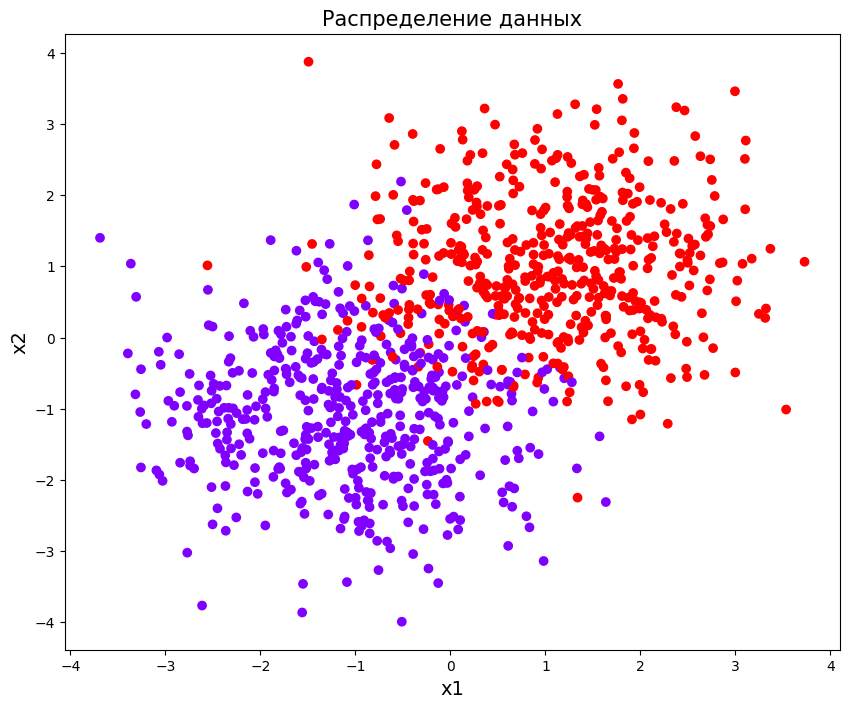

In [183]:
plt.figure(figsize=(10, 8)) # отрисуем его
plt.scatter(data[:, 0], data[:, 1], c=data[:, [2]], cmap='rainbow')
plt.title('Распределение данных', fontsize=15)
plt.xlabel('x1', fontsize=14)
plt.ylabel('x2', fontsize=14)
plt.show()

Видим, что данные нелинейные, запомним это.

В данном случае мы решаем задачу бинарной классификации (2 класса: 1 или 0), возьмём в качестве функции потерь среднеквадратичную ошибку:  

$$Loss(\hat{y}, y) = \frac{1}{2n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2 = \frac{1}{2n}\sum_{i=1}^{n} (f(w \cdot X_i + b) - y_i)^2$$  

Откуда взялась двойка в знаменателе? Просто потому что мы хотим убрать двойку после дифференцирования.

Здесь $w \cdot X_i$ - скалярное произведение, а $f()$ - пороговая функция:  

$$
f(w \cdot X_i + b) =
\begin{cases}
1, &\text{если } w \cdot X_i + b > 0 \\
0, &\text{если } w \cdot X_i + b \le 0
\end{cases}
$$  

На самом деле можно считать, что $b$ является частью вектора весов. Обозначим его как $w_0$, приписав к $X$ слева единичный столбец, тогда в скалярном произведении с каждым объектом $b$ будет именно как свободный член. При реализации класса `Perceptron()` мы будем обновлять $b$ отдельно от $w$.

Поскольку у пороговой функции не существует производной в нуле, то мы не можем использовать градиентный спуск:  

$$ \frac{\partial Loss}{\partial w} = \frac{1}{n} X^T\left(f(w \cdot X) - y\right)f'(w \cdot X)$$  

где $f^{'}(w \cdot X)$ - в точке 0 посчитать не получится. Но хочется как-то обновлять веса.

Поэтому обновлять будем так:   

$$w^{j+1} = w^{j} - \alpha\Delta{w^{j}}$$ 
$$b^{j+1} = b^{j} - \alpha\Delta{b^{j}}$$ 

где:  

$$\Delta{w} = \frac{1}{n}X^T(\hat{y} - y) = \frac{1}{n}X^T(f(X \cdot w^j + b^j) - y)$$  
$$\Delta{b} = \frac{1}{n}X^T(\hat{y} - y) = \frac{1}{n}1^T(f(X \cdot w^j + b^j) - y)$$  

где $w \cdot X$ - матричное произведение столбца весов $w$ на матрицу объектов-признаков $X$, $1^T$ - вектор-строка из единиц, а индекс $j$ - номер итерации градиентного спуска.

Это правило является частным случаем градиентного спуска (см. [метод коррекции ошибки](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BA%D1%86%D0%B8%D0%B8_%D0%BE%D1%88%D0%B8%D0%B1%D0%BA%D0%B8)).

In [184]:
def mse_loss(y_pred, y): # функция потерь MSE
    y_pred = y_pred.reshape(-1,1) # записали в столбик
    y = np.array(y).reshape(-1,1)
    
    return ((y_pred - y) ** 2).mean() / 2.0

In [188]:
class Perceptron: # создаем класс перцептрон

    def __init__(self, w=None, b=0):

        self.w = w # инициализация весов
        self.b = b # инициализация смещения
        
    def activate(self, x): # пороговая функция активации
        return np.array((x > 0).astype(np.float32))
        
    def forward(self, X): # прямой проход
        """
        Эта функция рассчитывает ответ перцептрона и возвращает
        вектор размера (n, 1) с ответами перцептрона 
        """
        y_pred = np.zeros((X.shape[0],1)) # инициализируем нулями ответы
        y_pred = self.activate(X @ self.w.reshape(X.shape[1],1)+self.b) # выполняем прямой проход
        return y_pred.reshape(-1,1) # запсиали в столбик
    
    def backward(self, X, y, y_pred, learning_rate=0.005): # обратный проход
        """
        Обновляет значения весов перцептрона в соответствии с
        learning_rate - "скорость обучения" (alpha в формулах выше)
        """
        n = X.shape[0] # размер выборки
        y = np.array(y).reshape(-1,1)
        dw = (X.T@(y_pred-y))/n # производная по весам
        db = (y_pred-y).mean(axis=0) # производная по смещению
        self.w -= learning_rate*dw # градиентный шаг
        self.b -= learning_rate*db
    
    def fit(self, X, y, num_epochs=3000): # функция обучения
        """
        num_epochs - количество итераций обучения
        возвращает losses - вектор значений функции потерь
        """
        self.w = np.zeros((X.shape[1], 1))  # вектор весов
        self.b = 0  # смещение
        losses = []  # значения функции потерь на различных итерациях обновления весов
        
        for i in range(num_epochs):
          y_pred = self.forward(X)
          losses.append(mse_loss(y_pred,y))
          self.backward(X,y,y_pred)

        return losses

Проверим работоспособность прямого прохода.

In [189]:
w = np.array([1., 2.]).reshape(2, 1)
b = 1.
X = np.array([[1., 2.2, -10.], [3., 4., -1.2]]) # создаем небольшой набор данных

perceptron = Perceptron(w, b)
y_pred = perceptron.forward(X.T)
print ("y_pred = " + str(y_pred))

y_pred = [[1.]
 [1.]
 [0.]]


Проверим работоспособность обратного прохода.

In [193]:
y = np.array([1, 0, 1]).reshape(3, 1)

In [194]:
perceptron.backward(X.T, y, y_pred)

print ("w = " + str(perceptron.w))
print ("b = " + str(perceptron.b))

w = [[0.97966667]
 [1.99133333]]
b = [1.]


In [195]:
X = data[:, [0, 1]] # обучающая выборка
y = data[:, [2]] # целевая переменная

In [198]:
X

array([[ 2.5198323 ,  1.1875348 ],
       [-3.30840384,  0.57189309],
       [-1.17576942, -0.12348146],
       ...,
       [ 1.36259714,  2.26493266],
       [ 0.27909985,  1.84265186],
       [-0.6082919 , -0.27302366]])

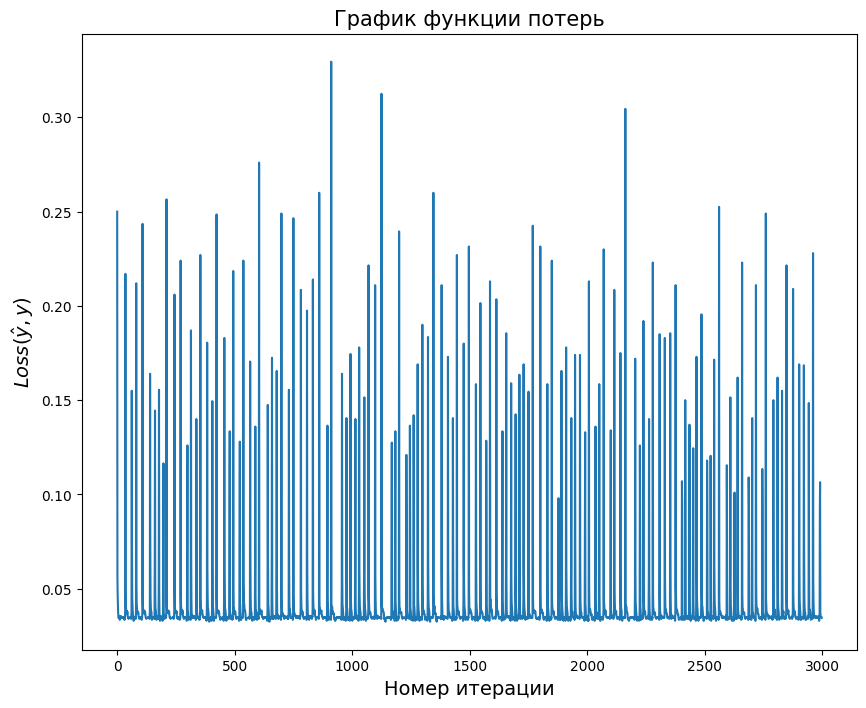

In [196]:
perceptron = Perceptron()
losses = perceptron.fit(X,y)

plt.figure(figsize=(10, 8))
plt.plot(losses)
plt.title('График функции потерь', fontsize=15)
plt.xlabel('Номер итерации', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

Что видим? Картина неприглядная, конечно. Мы рассчитывали, что лосс-функция будет падать с течением времени, однако видим лишь ее колебания. 

Неужели перцептрон не учится?

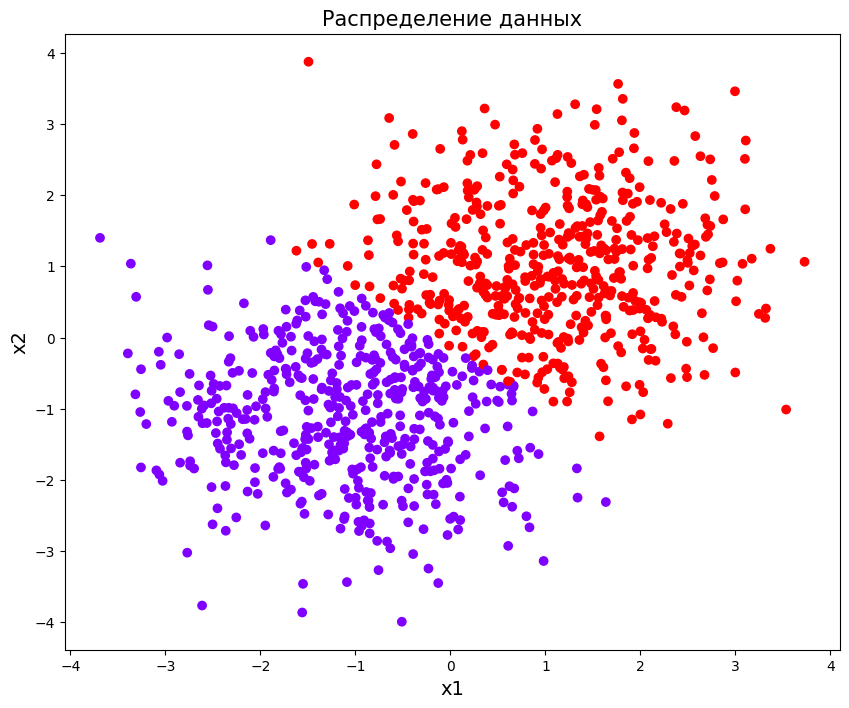

In [197]:
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], c=perceptron.forward(X), cmap='rainbow')
plt.title('Распределение данных', fontsize=15)
plt.xlabel('x1', fontsize=14)
plt.ylabel('x2', fontsize=14)
plt.show()

Видим, что он очень даже неплохо смог разделить выборку.

In [199]:
print(accuracy_score(perceptron.forward(X).ravel(), y)) # рассчитаем значение accuracy

0.93


И высокое значение accuracy это только подтверждает.

Так в чем же дело? 

Во-первых, данные нелинейны, и разделять их двумя нейронами весьма проблематично. 

Во-вторых, инициализация весов нулями не самая хорошая идея (подумайте, почему).

Этим и объясняется такое странное поведение лосса.

Из чего можно вынести важный урок, что высокое значение метрики вовсе не означает, что идет обучение.